# Fancy Indexing

In [1]:
import numpy as np

rand = np.random.RandomState(42)

## 1D

In [2]:
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [4]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [5]:
ind = [3,7,2]
x[ind]

array([71, 86, 14])

In [7]:
ind = np.array([[3,7],
                [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

Note that normal arrays don't work as index.

## 2D

In [8]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
X[1]

array([4, 5, 6, 7])

In [12]:
X[1,2]

6

In [15]:
row = np.array([0,1,2])
col = np.array([2,1,3])
# should yield 2, 5, 11
X[row, col]

array([ 2,  5, 11])

In [28]:
row2 = row[:, np.newaxis]
row2

array([[0],
       [1],
       [2]])

In [29]:
col2 = col
col

array([2, 1, 3])

broadcasting rules are applied to make dimensions of arrays equal

In [32]:
X[row2, col2] 

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

## Combined indexing

In [33]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [34]:
X[2,3]

11

In [35]:
X[2, [2,0,1]]

array([10,  8,  9])

In [36]:
X[1:, [2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [39]:
mask = np.array([1,0,1,0], dtype=bool)
X[row[:,np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

note that this works because of the boolean datatype. Ints work differently:

In [41]:
mask = np.array([1,0,1,0], dtype=int)
X[row[:,np.newaxis], mask]

array([[1, 0, 1, 0],
       [5, 4, 5, 4],
       [9, 8, 9, 8]])

## Example

In [42]:
mean = [0,0]
cov = [[1,2],
       [2,5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

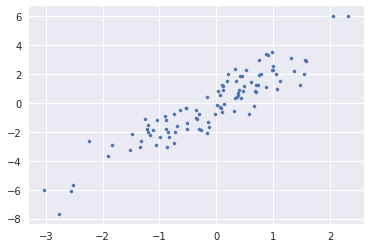

In [54]:
plt.scatter(X[:,0], X[:,1], s=10);

Let's select random points

In [91]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([63, 64, 76, 66, 79, 75, 14, 82, 98, 10, 53,  3, 21, 23,  9, 54, 20,
       58, 34, 31])

In [92]:
selection = X[indices]
selection.shape

(20, 2)

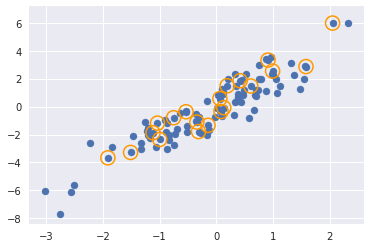

In [157]:
plt.scatter(X[:,0], X[:,1], alpha=1, s=50)
plt.scatter(selection[:,0], selection[:,1], s=200, facecolors='None', edgecolors='#ff9900', lw=1.5, alpha=1);

## Modifying values

In [101]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i]

array([2, 1, 8, 4])

In [102]:
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [103]:
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

### be careful

In [114]:
x = np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [108]:
x[[0,0]] = [4, 6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

the 4 is lost due to order of assignment, first the 4, then the 6.

### be even more careful

In [115]:
x = np.zeros(10)
i = [2,3,3,4,4,4]
x[i]

array([0., 0., 0., 0., 0., 0.])

In [116]:
x[i] += 1
x

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

only one assigment happened... This is due to the fact that the assignment is translated into `x[i] = x[i] + 1`, where the right part uses the old state of the array and the assinment happens 3 times, not the increment.

In [121]:
x = np.zeros(10)
np.add.at(x, i, 1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

## Binning

In [144]:
np.random.seed(42)
x = np.random.randn(100)

In [145]:
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

In [146]:
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [147]:
counts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

find the bin index for a value

In [148]:
i = np.searchsorted(bins, 1)
i

12

In [149]:
i = np.searchsorted(bins, x)

In [150]:
np.add.at(counts, i, 1)
counts

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])

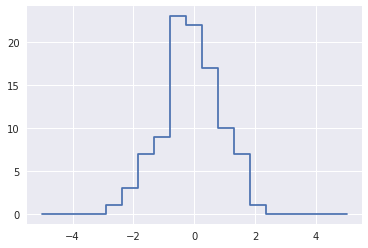

In [152]:
plt.plot(bins, counts, linestyle='steps');

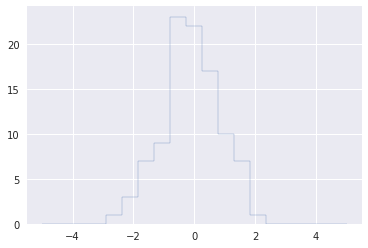

In [160]:
plt.hist(x, bins, histtype='step');

In [161]:
print("numpy binning")
%timeit counts, edges = np.histogram(x, bins)
print("custom binning")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

numpy binning
89.5 µs ± 4.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
custom binning
47.8 µs ± 2.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [162]:
np.histogram??

In [163]:
x = np.random.randn(1000000)
print("numpy binning")
%timeit counts, edges = np.histogram(x, bins)
print("custom binning")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

numpy binning
143 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
custom binning
379 ms ± 29.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
